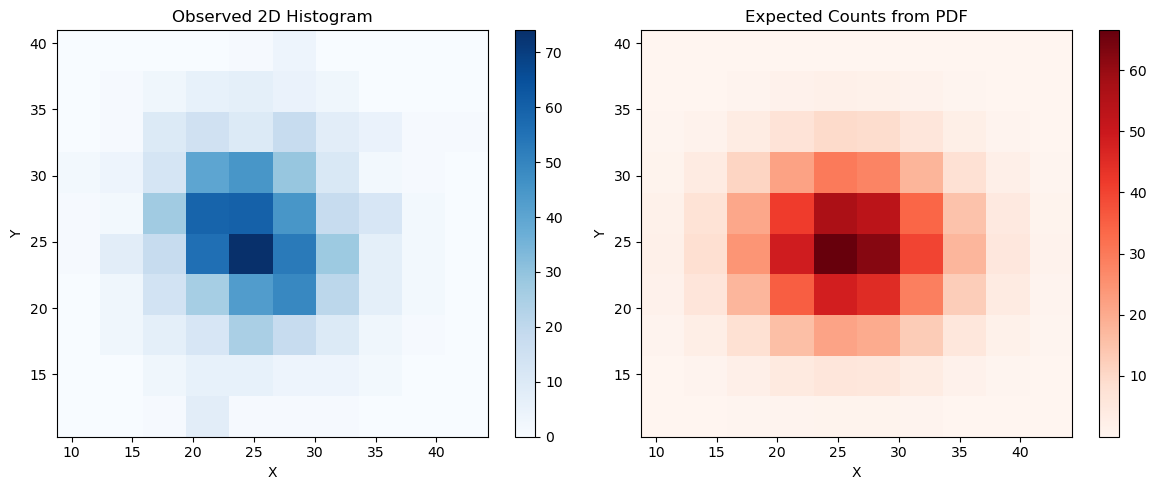

In [9]:
import numpy as np
from scipy.stats import multivariate_normal
import scipy.integrate
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2

# Generate example data
np.random.seed(42)
data_x = np.random.normal(loc=25, scale=5, size=1000)  # x data with mean=25 and std=5
data_y = np.random.normal(loc=25, scale=5, size=1000)  # y data with mean=25 and std=5

# Create a 2D histogram
num_bins = 10
hist, xedges, yedges = np.histogram2d(data_x, data_y, bins=num_bins)

# Calculate statistics
mean_x = np.mean(data_x)
std_x = np.std(data_x)
mean_y = np.mean(data_y)
std_y = np.std(data_y)

# Define the multivariate normal distribution
var = multivariate_normal(mean=[mean_x, mean_y], cov=[[std_x**2, 0], [0, std_y**2]])

# Function to integrate
F = lambda x, y: var.pdf([y, x])  # Note the order of y, x

# Function to integrate over a bin area
def integrate_bin_area(F, x_min, x_max, y_min, y_max):
    result, error = scipy.integrate.dblquad(F, y_min, y_max, lambda x: x_min, lambda x: x_max)
    return result

# Initialize array to hold expected counts
expected_counts = np.zeros((num_bins, num_bins))

# Total number of data points
total_points = len(data_x)

# Calculate expected counts for each bin
for i in range(num_bins):
    for j in range(num_bins):
        # Define the edges of the bin
        x_min, x_max = xedges[i], xedges[i + 1]
        y_min, y_max = yedges[j], yedges[j + 1]
        
        # Integrate over the bin
        probability_mass = integrate_bin_area(F, x_min, x_max, y_min, y_max)
        
        # Calculate expected count
        expected_counts[i, j] = probability_mass * total_points

# # Print results
# print(f"Estimated Mean X: {mean_x:.2f}, Std X: {std_x:.2f}")
# print(f"Estimated Mean Y: {mean_y:.2f}, Std Y: {std_y:.2f}")
# print("Expected counts in each bin:")
# print(expected_counts)

# Optional: Plotting the histogram and expected counts
plt.figure(figsize=(12, 5))

# Plot observed histogram
plt.subplot(1, 2, 1)
plt.hist2d(data_x, data_y, bins=num_bins, cmap='Blues')
plt.colorbar()
plt.title('Observed 2D Histogram')
plt.xlabel('X')
plt.ylabel('Y')

# Plot expected counts
plt.subplot(1, 2, 2)
plt.imshow(expected_counts, interpolation='nearest', origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Reds', aspect='auto')
plt.colorbar()
plt.title('Expected Counts from PDF')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()


## Observed Counts

In [10]:
print(hist)

[[ 0.  0.  0.  0.  1.  1.  2.  0.  0.  0.]
 [ 0.  0.  3.  3.  8.  2.  4.  1.  1.  0.]
 [ 1.  3.  7. 14. 18. 27. 13. 10.  3.  0.]
 [ 8.  6. 12. 26. 56. 59. 40. 15.  6.  0.]
 [ 1.  6. 25. 43. 74. 60. 45. 10.  7.  1.]
 [ 1.  4. 18. 49. 53. 45. 29. 18.  5.  4.]
 [ 1.  4. 10. 21. 28. 18. 11.  8.  3.  0.]
 [ 0.  2.  3.  7.  7. 12.  2.  5.  0.  0.]
 [ 0.  0.  1.  2.  2.  2.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


## Expected counts

In [11]:
np.set_printoptions(precision=0)
np.set_printoptions(suppress=True)
expected_counts

array([[ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  4.,  6.,  5.,  4.,  2.,  0.,  0.],
       [ 1.,  3.,  8., 16., 21., 20., 13.,  6.,  2.,  0.],
       [ 1.,  6., 18., 35., 48., 45., 29., 13.,  4.,  1.],
       [ 2.,  8., 24., 49., 67., 62., 40., 17.,  5.,  1.],
       [ 2.,  7., 21., 41., 57., 53., 34., 15.,  4.,  1.],
       [ 1.,  4., 11., 22., 30., 28., 18.,  8.,  2.,  0.],
       [ 0.,  1.,  3.,  7., 10.,  9.,  6.,  3.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  2.,  2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
# Flatten the arrays for the Chi-squared test
observed_counts  = hist
observed_counts_flat = hist.flatten()
expected_counts_flat = expected_counts.flatten()

In [13]:
total_observed = np.sum(observed_counts_flat)
total_expected = np.sum(expected_counts_flat)

# Scale expected counts to match the total observed counts if necessary #code show up error here
if total_observed != total_expected:
    expected_counts_flat *= (total_observed / total_expected)

# Perform Chi-square goodness of fit test
chi_square_stat, p_value = chisquare(f_obs=observed_counts_flat, f_exp=expected_counts_flat)

# Calculate degrees of freedom
df = len(observed_counts_flat) - 1  # Degrees of freedom is typically number of bins - 1

# Calculate the critical value for 95% confidence
critical_value = chi2.ppf(0.95, df)

# Print the results
print("Chi-square Statistic:", chi_square_stat)
print("Degrees of Freedom:", df)
print("p-value:", p_value)
print("Critical Value (95% confidence):", critical_value)

# Check goodness of fit based on p-value and Chi-square statistic
if chi_square_stat > critical_value:
    print("The observed data significantly deviates from the expected distribution.")
    print("Consider rejecting the null hypothesis of good fit.")
else:
    print("The observed data fits the expected distribution within the chosen significance level.")
    print("Fail to reject the null hypothesis of goodness of fit.")

Chi-square Statistic: 122.75681954861986
Degrees of Freedom: 99
p-value: 0.053044148872778
Critical Value (95% confidence): 123.2252214533618
The observed data fits the expected distribution within the chosen significance level.
Fail to reject the null hypothesis of goodness of fit.
